# SKU統計表分析

庫存所可以控制的最小單位。

以 iPhone 手機為例，型號+配備（如「iPhone 6s + 玫瑰金+ 16G 記憶體」）就是一個 SKU。


對PTT運動內衣資料進行SKU分析，包括顏色與尺寸需求統計。

In [1]:
# 載入相關套件
import pandas as pd


 ## 資料匯入與前處理

In [2]:
# 讀取檔案
comment_Data = pd.read_csv("data/PTT_運動內衣_所有資料.csv")
comment_Data = comment_Data[comment_Data['所有文'].str.contains('運動內衣|運動bra', na=False)]  # na=False意思是遇到非字符串的情况，直接忽略

# 讀取SKU檔案
color = pd.read_csv('data/SKU_顏色.csv')
size = pd.read_csv('data/SKU_尺寸.csv')


 ## 顏色與尺寸關鍵字標記

In [3]:
# 計算「關鍵字」欄位中，不同顏色的計數
for color_i in color['顏色']:
    comment_Data[color_i] = comment_Data['關鍵字'].apply(lambda x: 1 if color_i in x else 0)

# 計算「關鍵字」欄位中，不同尺寸的計數
for size_i in size['尺寸']:
    comment_Data[size_i] = comment_Data['關鍵字'].apply(lambda x: 1 if size_i in x else 0)

comment_Data[[*color['顏色'], *size['尺寸']]]

,深藍,酒紅,軍綠色,熒光綠,深灰,藏青,黃,紅,桃,焦糖,...,白,黑,5XL,4XL,3XL,2XL,XL,L,M,S
2361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2421,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
2452,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
2482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2518,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15704,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
15709,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
16052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17169,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


 ## 顏色與尺寸需求統計表

In [4]:
# 先以單個顏色來做示範。計算同時提到「顏色」與「尺寸」的計數。
comment_Datatmp = comment_Data[comment_Data["黃"] == 1]  # 挑選某顏色有被提到的筆數

comment_Data_groupby = comment_Datatmp.groupby("黃", as_index=False)[["5XL", "4XL", "3XL", "2XL", "XL", "L", "M", "S"]].sum()

comment_Data_groupby = comment_Data_groupby.rename(columns={"黃": '顏色'})  # 更改欄位名稱

comment_Data_groupby['顏色'] = "黃"  # 將顏色欄位存入顏色名

comment_Data_groupby

,顏色,5XL,4XL,3XL,2XL,XL,L,M,S
0,黃,0,0,0,0,1,4,5,4


 ## 建立完整SKU需求統計表

In [5]:
# 再以迴圈來計算多個顏色。計算同時提到「顏色」與「尺寸」的計數。
sku_list = []

for color_i in color['顏色']:
    # 將尺寸由series->list，以做為之後欄位值讀取
    sizelist = size['尺寸'].tolist()

    # 針對不同顏色來計算不同尺寸被共同提到的總和
    comment_Datatmp = comment_Data[comment_Data[color_i] == 1]  # 挑選某顏色有被提到的筆數

    comment_Data_groupby = comment_Datatmp.groupby(color_i, as_index=False)[sizelist].sum()

    comment_Data_groupby = comment_Data_groupby.rename(columns={color_i: '顏色'})

    comment_Data_groupby['顏色'] = color_i  # 將數值1改為顏色名

    # 存入list中，等待後續dataframe的合併
    sku_list.append(comment_Data_groupby)

# 合併所有不同顏色與尺寸之間的sku表
sku_listdf = pd.concat(sku_list)

sku_listdf.set_index('顏色', inplace=True)

sku_listdf


,5XL,4XL,3XL,2XL,XL,L,M,S
顏色,,,,,,,,
黃,0,0,0,0,1,4,5,4
紅,0,0,0,0,1,6,12,11
桃,0,0,0,0,1,4,3,5
紫色,0,0,0,0,0,3,0,2
藍,1,0,1,1,3,6,7,7
橘,0,0,0,0,1,2,2,1
綠,0,0,0,0,0,5,5,6
灰,1,0,1,1,3,10,7,7
白,0,0,0,0,1,10,14,14


 ## 繪製顏色尺寸需求統計圖表（數量）

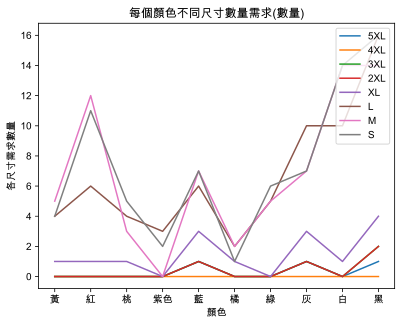

In [6]:
# 繪圖: 顏色尺寸需求統計表(數量).csv)(x軸顏色，Y軸各尺寸需求數量)
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

sku_listdf.plot(title="每個顏色不同尺寸數量需求(數量)")
plt.ylabel('各尺寸需求數量')
plt.xticks(range(len(sku_listdf.index)), sku_listdf.index, fontsize=10)

# 設定圖例位置（右上）
plt.legend(loc='upper right')

plt.show()


 ## 繪製個別顏色的尺寸需求圖表

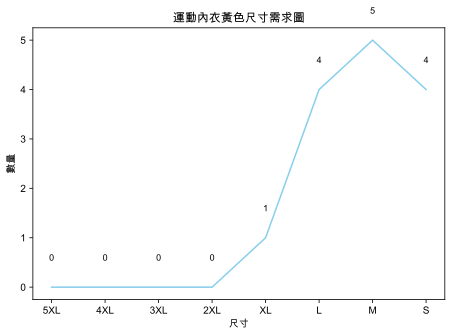

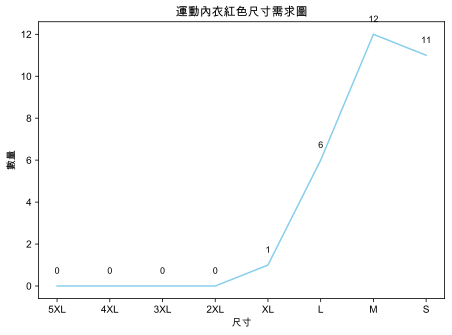

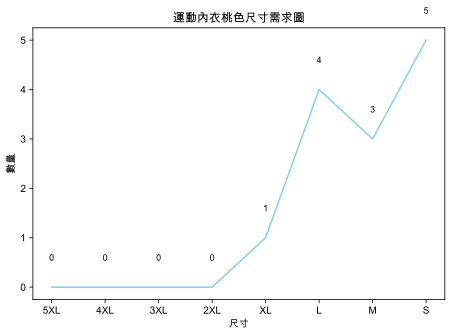

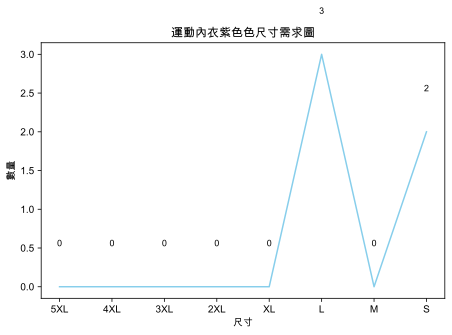

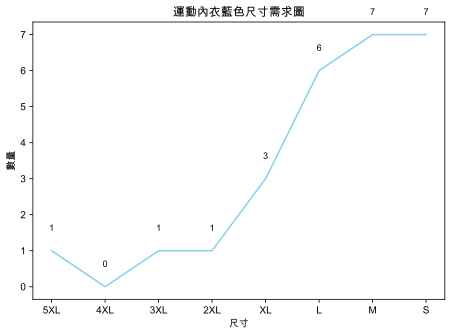

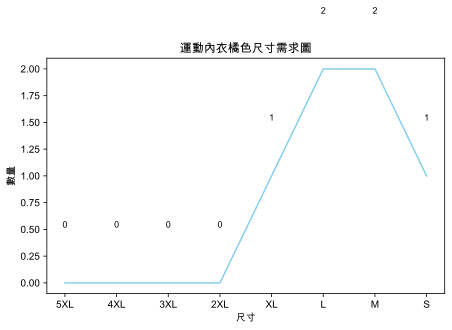

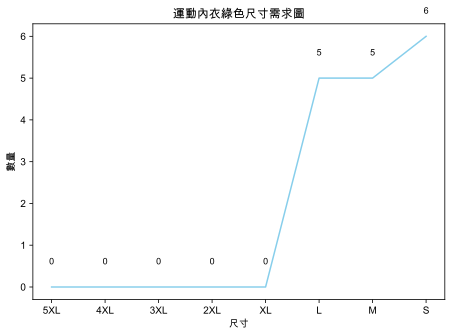

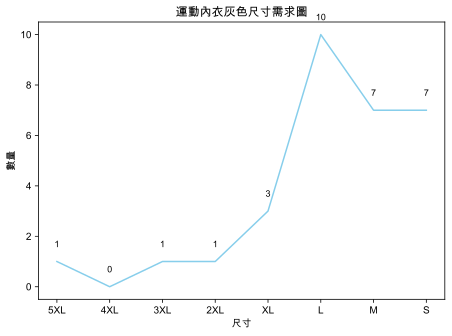

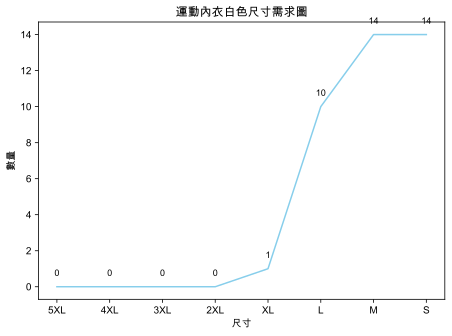

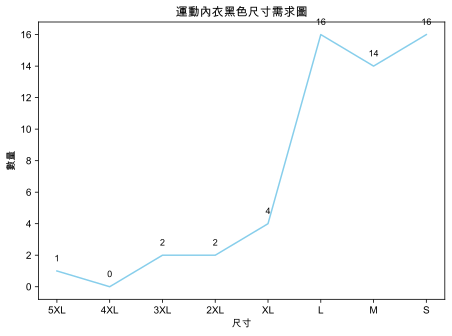

In [7]:
# 繪圖-每個顏色不同尺寸需求數量(每個顏色一張尺寸需求表)
import matplotlib.pyplot as plt

for i in range(len(sku_listdf)):
    row = sku_listdf.iloc[i]
    ax = row.plot(color='skyblue')  # 改為 bar 圖以利加標籤

    # 標題顯示「運動內衣:XX色尺寸需求圖」
    plt.title(f"運動內衣{sku_listdf.index[i]}色尺寸需求圖")

    # 數值標籤
    for j, value in enumerate(row):
        ax.text(j, value + 0.5, str(int(value)), ha='center', va='bottom', fontsize=9)

    plt.ylabel("數量")
    plt.xlabel("尺寸")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


 ## 練習：顏色尺寸需求百分比統計表



 問題: 每個顏色在不同尺寸需求統計表(百分比)

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 複製原始資料
sku_listdf_percent = sku_listdf.copy()

# 計算每個顏色的總需求量
color_totals = sku_listdf_percent.sum(axis=1)

# 將每個尺寸的數量轉換為百分比
for col in sku_listdf_percent.columns:
    sku_listdf_percent[col] = (sku_listdf_percent[col] / color_totals) * 100

# 儲存百分比統計表
sku_listdf_percent


,5XL,4XL,3XL,2XL,XL,L,M,S
顏色,,,,,,,,
黃,0.000000,0.0,0.000000,0.000000,7.142857,28.571429,35.714286,28.571429
紅,0.000000,0.0,0.000000,0.000000,3.333333,20.000000,40.000000,36.666667
桃,0.000000,0.0,0.000000,0.000000,7.692308,30.769231,23.076923,38.461538
紫色,0.000000,0.0,0.000000,0.000000,0.000000,60.000000,0.000000,40.000000
藍,3.846154,0.0,3.846154,3.846154,11.538462,23.076923,26.923077,26.923077
橘,0.000000,0.0,0.000000,0.000000,16.666667,33.333333,33.333333,16.666667
綠,0.000000,0.0,0.000000,0.000000,0.000000,31.250000,31.250000,37.500000
灰,3.333333,0.0,3.333333,3.333333,10.000000,33.333333,23.333333,23.333333
白,0.000000,0.0,0.000000,0.000000,2.564103,25.641026,35.897436,35.897436


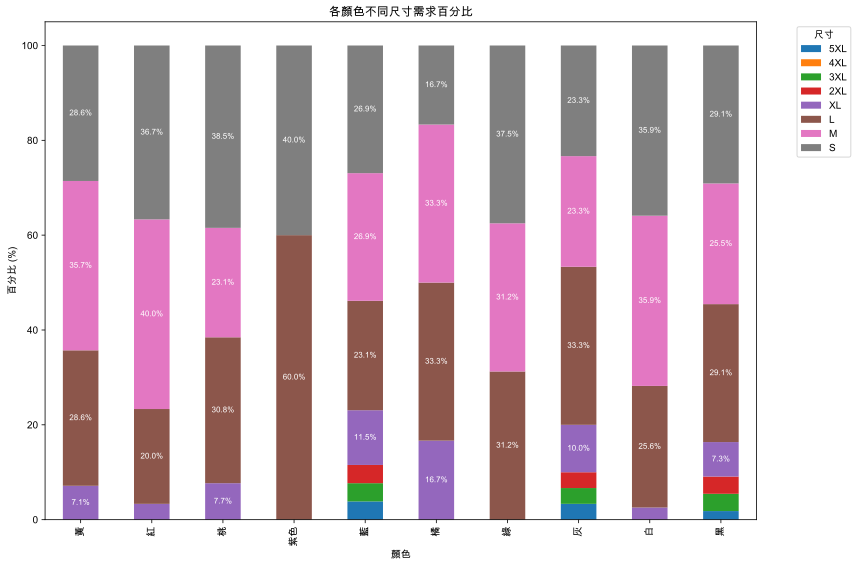

In [9]:
# 繪製百分比堆疊圖
sku_listdf_percent.plot(kind='bar', stacked=True, figsize=(12, 8),
                         title='各顏色不同尺寸需求百分比')
plt.ylabel('百分比 (%)')
plt.xlabel('顏色')
plt.legend(title='尺寸', bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加百分比標籤
for i, color in enumerate(sku_listdf_percent.index):
    cum_sum = 0
    for size in sku_listdf_percent.columns:
        value = sku_listdf_percent.loc[color, size]
        if value > 5:  # 只標示大於5%的值，避免過於擁擠
            plt.text(i, cum_sum + value/2, f'{value:.1f}%',
                     ha='center', va='center', fontsize=8, color='white', fontweight='bold')
        cum_sum += value

plt.tight_layout()
plt.show()

 ## 練習：尺寸需求統計表(百分比)



 問題: (1)計算每個尺寸需求統計表(百分比)(2)繪製圖表，X軸為尺寸，Y軸為需求百分比，並加入數值標籤

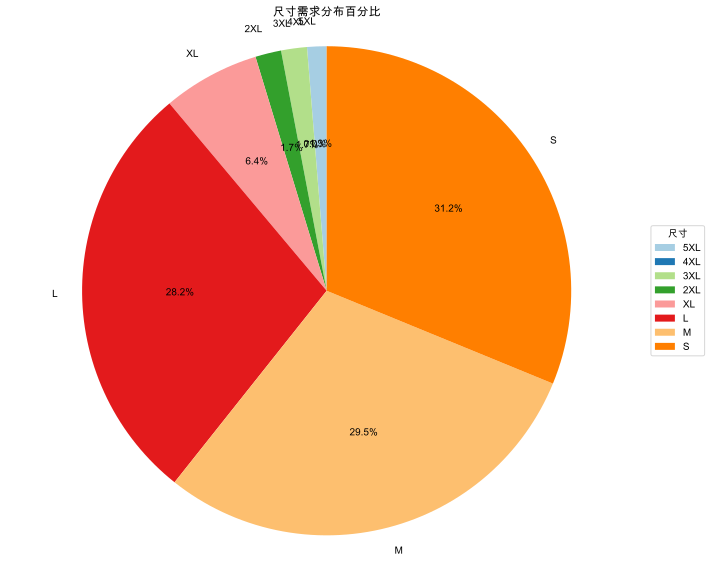

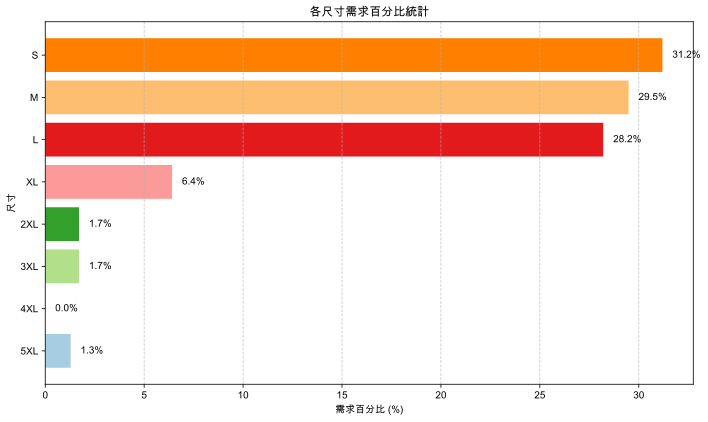

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 複製資料集
sizeall = sku_listdf.copy()

# 計算總體尺寸需求
size_counts = sizeall.sum()
size_percent = (size_counts / size_counts.sum()) * 100

# 繪製圓餅圖顯示尺寸總體分布
plt.figure(figsize=(10, 8))
plt.pie(size_percent, labels=size_percent.index, autopct='%1.1f%%', 
        startangle=90, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('尺寸需求分布百分比')
plt.legend(title="尺寸", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

# 繪製橫向長條圖
plt.figure(figsize=(10, 6))
bars = plt.barh(size_percent.index, size_percent, color=plt.cm.Paired.colors)
plt.xlabel('需求百分比 (%)')
plt.ylabel('尺寸')
plt.title('各尺寸需求百分比統計')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 添加數值標籤
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()